# Self correlation

In [18]:
%matplotlib inline

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [20]:
from statsmodels.tsa import stattools

In [21]:
pal = sns.color_palette()

## Get stock time series data

In [22]:
sp500 = pd.read_csv(pathlib.Path('sp500.csv'), header=0)

## Noise data

Text(0.5, 0.98, 'noise')

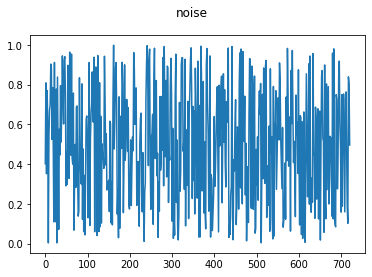

In [23]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
plt.plot(grid, noise)
plt.suptitle('noise')

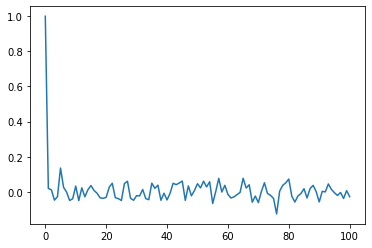

In [58]:
acf_result = stattools.acf(noise, nlags=100, fft=False)
plt.plot(acf_result)

## Periodic data

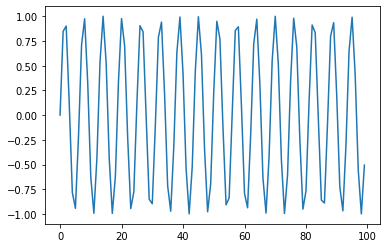

In [59]:
grid = np.linspace(0, 100, 100)
sin_data = np.sin(grid)
plt.plot(sin_data)

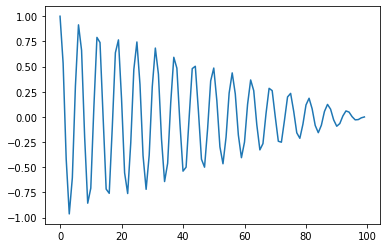

In [60]:
acf_result = stattools.acf(sin_data, nlags=100, fft=False)
plt.plot(acf_result)

## Stock prices

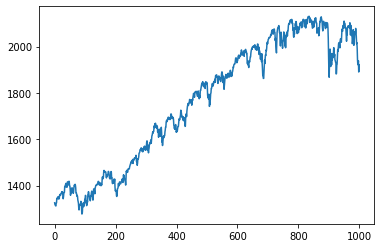

In [81]:
plt.plot(range(sp500.shape[0]), sp500.close)

## Airline passengers

In [16]:
airline_data_file = pathlib.Path('AirPassengers.csv')
air_passengers = pd.read_csv(
    airline_data_file, header=0, parse_dates=[0]).rename(columns={
    'Month': 'month',
    '#Passengers': 'passengers'
}).set_index('month')

air_passengers.shape

(144, 1)

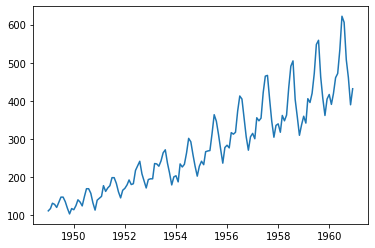

In [14]:
plt.plot(air_passengers)

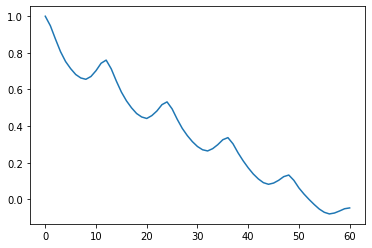

In [32]:
acf_result = stattools.acf(air_passengers, nlags=60, fft=False)
plt.plot(acf_result)

## Detrend the data

<AxesSubplot:xlabel='month'>

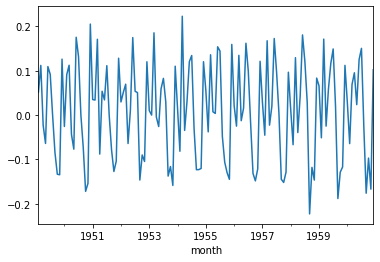

In [50]:
log_air_passengers = np.log(air_passengers.passengers)
log_air_passengers_diff = (
    log_air_passengers - log_air_passengers.shift()).dropna()
log_air_passengers_diff.plot()

In [65]:
acf_result = stattools.acf(log_air_passengers_diff.values, nlags=60, fft=False)

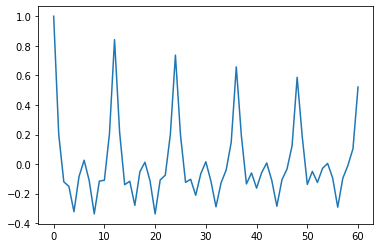

In [66]:
plt.plot(acf_result)